    
## <center> SOLUCIÓN AL NOTEBOOK DEL QS 2023


Autor: Cesar Pezo Roel \
Institución: Universidad Nacional de Ingeniería\
Correo: cpezor@uni.pe

1.- ¿Cuál es el vector de estado de un sistema compuesto por 3 qubits , estando los qubits individuales(e independientes) en los estados  $|+\rangle $ , $|+\rangle $,$| -\rangle $,? Luego hacer las mediciones parciales para el qubit central, repetir lo mismo con qiskit.

![title](./01.jpg)

![title](./02.jpg)

In [24]:
from qiskit.visualization import array_to_latex
from qiskit.quantum_info import Statevector 
import numpy as np
from qiskit.quantum_info.operators import Operator

Ket_3_qubits = Statevector([1, -1, 1, -1, 1, -1, 1, -1]/(2*np.sqrt(2)))
Ket_3_qubits = Statevector.from_label('++-')
Ket_3_qubits.draw('Latex')

<IPython.core.display.Latex object>

In [25]:
Ket_3_qubits.is_valid()

True

In [26]:
probs_Ket_3_qubits = Ket_3_qubits.probabilities_dict([1])
#print('probs: {}'.format(probs_Ket_3_qubits))
print(probs_Ket_3_qubits)

{'0': 0.4999999999999998, '1': 0.4999999999999998}


2.- ¿Cuántos qubits independientes tiene como mínimo el siguiente sistema?

<center>
<img src="https://raw.githubusercontent.com/tonymilla/QuantumScholars2023/main/imagenes/examen/q_spherequestion.png">

La cantidad de qubits independientes minimo para el sistema son 4 elementos

In [7]:
from qiskit.visualization import array_to_latex
from qiskit.quantum_info import Statevector 
import numpy as np
from qiskit.quantum_info.operators import Operator
from qiskit.visualization import plot_state_qsphere

ket_1 = Statevector.from_label('0010')
ket_2 = Statevector.from_label('1101')
ket = Statevector([0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0])/(np.sqrt(2))
ket.draw('Latex')

<IPython.core.display.Latex object>

In [8]:
ket.is_valid()

True

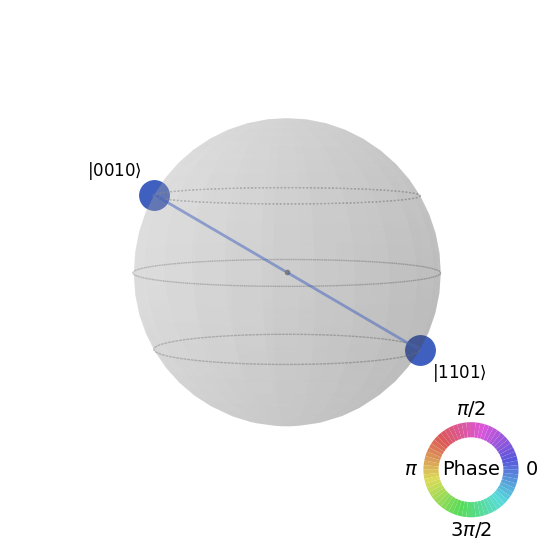

In [9]:
plot_state_qsphere(ket)

3.- ¿Cómo se escribiría en notación de Dirac una compuerta CU3 desarrollalo e implementalo en qiskit para $\theta = \pi$, $\phi = \frac{\pi}{2}$ y $\lambda = \frac{7\pi}{2}$.

![title](./03.jpg)

![title](./04.jpg)

![title](./05.jpg)

![title](./06.jpg)

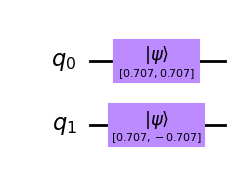

In [68]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_bloch_multivector
from qiskit import execute, Aer
import numpy as np

decimo_circuito = QuantumCircuit(2)
decimo_circuito.initialize(Statevector.from_label("+").data, 0)
decimo_circuito.initialize(Statevector.from_label("-").data, 1)
decimo_circuito.draw("mpl")

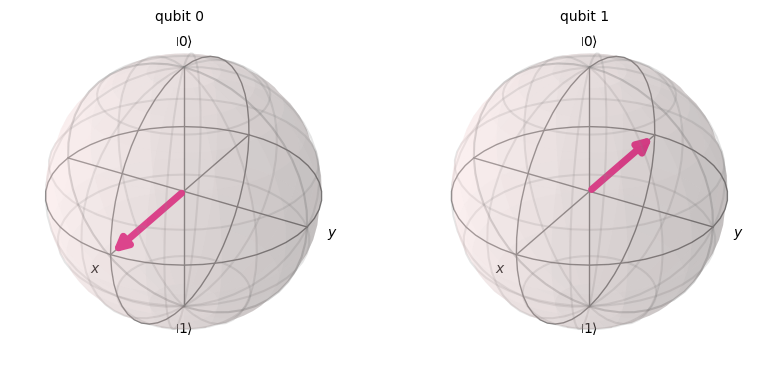

In [63]:
plot_bloch_multivector(decimo_circuito)

El metodo cu3 ya esta descontinuado se usa el QuantumCircuit.cu(theta,phi,lambda,gamma=0,control_bit, target_bit). fuente= https://github.com/Qiskit/qiskit-tutorials/issues/1314

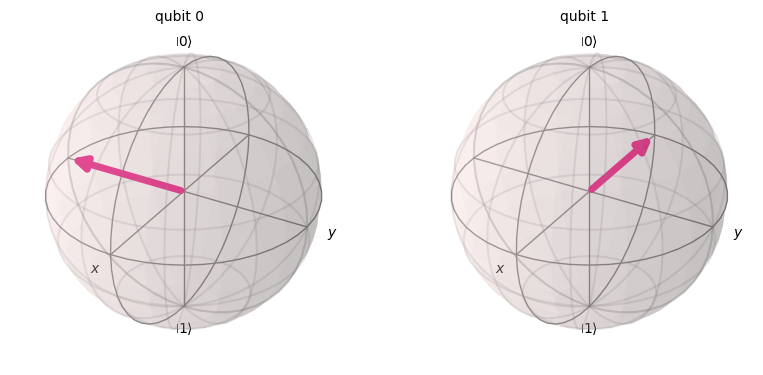

In [69]:
decimo_circuito.cu(np.pi, np.pi/2,(7*np.pi/2),0,0,1)
plot_bloch_multivector(decimo_circuito)

4.- A partir de la relación existente entre la operación (módulo 2) y el operador XOR ($\oplus$). Mostrar:

\begin{align}
\sum_{i=1}^n x_iz_i \pmod 2=x_1z_1\oplus x_2z_2\oplus\cdots\oplus x_nz_n
\end{align}

![title](./07.jpg)
![title](./08.jpg)
![title](./09.jpg)

5.- Implementa el código para la función oráculo balanceado con $n=3$, la cual retorna el circuito cuántico qc. Considere que $f(x)$ está dado por:

\begin{align}
f(001)&=0\\
f(000)&=0\\
f(111)&=0\\
f(110)&=0\\
f(011)&=1\\
f(010)&=1\\
f(100)&=1\\
f(101)&=1\\
\end{align}

![title](./010.jpg)

In [21]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit import execute, Aer
import numpy as np

oraculo_b = QuantumCircuit(4)

oraculo_b.x(2)
oraculo_b.barrier()

for x in range(3):
    oraculo_b.cx(x,3)

oraculo_b.barrier()
oraculo_b.x(2)
oraculo_b.barrier()

oraculo_b.draw()

░                 ░       ░ 
q_0: ──────░───■─────────────░───────░─
           ░   │             ░       ░ 
q_1: ──────░───┼────■────────░───────░─
     ┌───┐ ░   │    │        ░ ┌───┐ ░ 
q_2: ┤ X ├─░───┼────┼────■───░─┤ X ├─░─
     └───┘ ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░ └───┘ ░ 
q_3: ──────░─┤ X ├┤ X ├┤ X ├─░───────░─
           ░ └───┘└───┘└───┘ ░       ░

In [22]:
qcc=QuantumCircuit(4,3)
qcc.x(3)
qcc.h(3)
qcc.barrier()

for x in range(3):
    qcc.h(x)
qcc.barrier()

qcc=qcc.compose(oraculo_b)
qcc.barrier

for x in range(3):
    qcc.h(x)
qcc.barrier()

#qcc.measure([0,1,2,3],[0,1,2,3])
qcc.measure([0,1,2],[0,1,2])
qcc.draw()

░ ┌───┐ ░       ░                 ░       ░ ┌───┐ ░ ┌─┐      
q_0: ───────────░─┤ H ├─░───────░───■─────────────░───────░─┤ H ├─░─┤M├──────
                ░ ├───┤ ░       ░   │             ░       ░ ├───┤ ░ └╥┘┌─┐   
q_1: ───────────░─┤ H ├─░───────░───┼────■────────░───────░─┤ H ├─░──╫─┤M├───
                ░ ├───┤ ░ ┌───┐ ░   │    │        ░ ┌───┐ ░ ├───┤ ░  ║ └╥┘┌─┐
q_2: ───────────░─┤ H ├─░─┤ X ├─░───┼────┼────■───░─┤ X ├─░─┤ H ├─░──╫──╫─┤M├
     ┌───┐┌───┐ ░ └───┘ ░ └───┘ ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░ └───┘ ░ └───┘ ░  ║  ║ └╥┘
q_3: ┤ X ├┤ H ├─░───────░───────░─┤ X ├┤ X ├┤ X ├─░───────░───────░──╫──╫──╫─
     └───┘└───┘ ░       ░       ░ └───┘└───┘└───┘ ░       ░       ░  ║  ║  ║ 
c: 3/════════════════════════════════════════════════════════════════╩══╩══╩═
                                                                     0  1  2

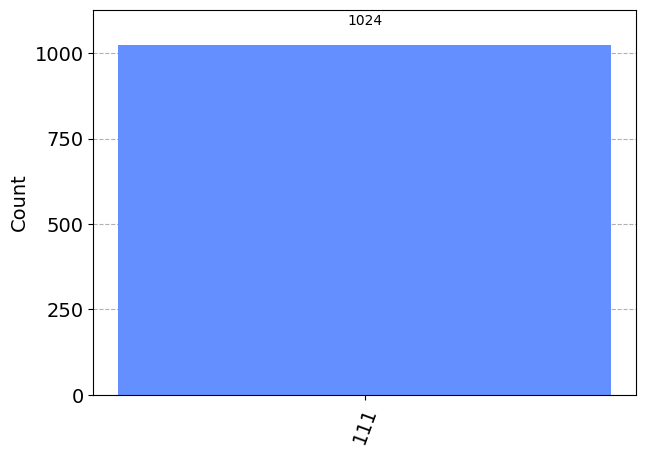

In [23]:
aer_si = Aer.get_backend('aer_simulator')
result = aer_si.run(qcc).result()
answe = result.get_counts()

plot_histogram(answe)

6.- En la construcción más simple posible de un oráculo balanceado, se utiliza la compuerta $CX$, la cual toma como objetivo el $(n+1)$-ésimo qubit del circuito y como control cada uno de los $n$ primeros qubits. Sin embargo, ¿es realmente necesario aplicar $CX$ a todos los $n$ primeros qubits, o podríamos prescindir de algunos y obtener igualmente un oráculo balanceado?

![title](./011.jpg)

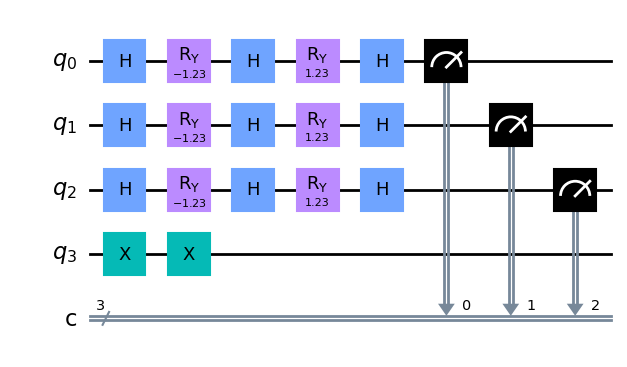

In [13]:
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import circuit_drawer

# Definir la función f
def f(x):
    if x in ['010', '011', '100', '101']:
        return 1
    else:
        return 0

# Crear un circuito cuántico con 4 qubits (3 para la entrada y 1 para la salida)
n = 3
qc = QuantumCircuit(n + 1, n)

# Compuertas Hadamard en los qubits de entrada
for i in range(n):
    qc.h(i)

# Implementación de la función f utilizando compuertas de rotación y Hadamard
for i in range(2**n):
    if f(format(i, f'0{n}b')) == 1:
        qc.x(n)
        for j in range(n):
            qc.ry(-1.2309594, j)  # Ángulo calculado para implementar una compuerta NOT
            qc.h(j)
            qc.ry(1.2309594, j)   # Ángulo calculado para restaurar el estado original
        qc.x(n)
        break  # Solo necesitamos una entrada para que f sea 1

# Compuertas Hadamard nuevamente en los qubits de entrada
for i in range(n):
    qc.h(i)

# Medición de los qubits de entrada
for i in range(n):
    qc.measure(i, i)

# Dibujar el circuito
circuit_drawer(qc, output="mpl")

7.- Implemente el algoritmo de Grover para determinar la máxima cantidad de aristas en un grafo de 5 nodos y 6 aristas:

\begin{align}
(0,3)\\
(0,4)\\
(1,3)\\
(1,4)\\
(2,3)\\
(2,4)\\
\end{align}

![title](./012.jpg)

In [18]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.circuit.library import XGate,ZGate
from qiskit.visualization import plot_histogram
from qiskit import execute, Aer

In [19]:
def oracle_part(qc,qr):
    mcx = XGate().control(5)
    
    #Los qubits del 0 al 3 son los nodos.
    #Los qubits del 4 al 8 nos permiten reconocer si la arista es correcta
    #(i.e. si se da entre nodos de distinto color).
    qc.cx(qr[0], qr[5])
    qc.cx(qr[3], qr[5])
    qc.barrier()
    qc.cx(qr[0], qr[6])
    qc.cx(qr[4], qr[6])
    qc.barrier()
    qc.cx(qr[1], qr[7])
    qc.cx(qr[3], qr[7])
    qc.barrier()
    qc.cx(qr[1], qr[8])
    qc.cx(qr[4], qr[8])
    qc.barrier()
    qc.cx(qr[2], qr[9])
    qc.cx(qr[3], qr[9])
    qc.barrier()
    qc.cx(qr[2], qr[10])
    qc.cx(qr[4], qr[10])
    qc.barrier()
    
    """
    #Los qubits del 9 al 11 nos van a permitir contar la cantidad de aristas correctas
    #de tal forma que la suma será expresada en binario con cifras dadas por q_11, q_10 y q_9.
    qc.barrier()    
    qc.cx(qr[4],qr[9])
    qc.barrier()
    
    qc.ccx(qr[5], qr[9], qr[10])
    qc.cx(qr[5],qr[9])
    qc.barrier()
    
    qc.ccx(qr[6], qr[9], qr[10])
    qc.cx(qr[6],qr[9])
    qc.barrier()
    
    qc.append(mcx,[7,9,10,11])
    qc.ccx(qr[7], qr[9], qr[10])
    qc.cx(qr[7],qr[9])
    qc.barrier()
    
    qc.append(mcx,[8,9,10,11])
    qc.ccx(qr[8], qr[9], qr[10])
    qc.cx(qr[8],qr[9])
    qc.barrier()
    
    qc.x(qr[9])
    qc.x(qr[10])
    qc.barrier()
    
    #El qubit 12 indicará cuando se haya encontrado un estado deseado
    qc.append(mcx,[9,10,11,12])
"""   
    return qc

In [20]:
qr=QuantumRegister(11)
qc=QuantumCircuit(qr)
oracle_part(qc,qr).draw()

░            ░            ░            ░            ░      »
 q0_0: ──■────────░───■────────░────────────░────────────░────────────░──────»
         │        ░   │        ░            ░            ░            ░      »
 q0_1: ──┼────────░───┼────────░───■────────░───■────────░────────────░──────»
         │        ░   │        ░   │        ░   │        ░            ░      »
 q0_2: ──┼────────░───┼────────░───┼────────░───┼────────░───■────────░───■──»
         │        ░   │        ░   │        ░   │        ░   │        ░   │  »
 q0_3: ──┼────■───░───┼────────░───┼────■───░───┼────────░───┼────■───░───┼──»
         │    │   ░   │        ░   │    │   ░   │        ░   │    │   ░   │  »
 q0_4: ──┼────┼───░───┼────■───░───┼────┼───░───┼────■───░───┼────┼───░───┼──»
       ┌─┴─┐┌─┴─┐ ░   │    │   ░   │    │   ░   │    │   ░   │    │   ░   │  »
 q0_5: ┤ X ├┤ X ├─░───┼────┼───░───┼────┼───░───┼────┼───░───┼────┼───░───┼──»
       └───┘└───┘ ░ ┌─┴─┐┌─┴─┐ ░   │    │   ░   │    │   ░   │    │   ░   │  »
 q0_6: ───────────░─┤ X ├┤ X ├─░───┼────┼───░───┼────┼───░───┼────┼───░───┼──»
                  ░ └───┘└───┘ ░ ┌─┴─┐┌─┴─┐ ░   │    │   ░   │    │   ░   │  »
 q0_7: ───────────░────────────░─┤ X ├┤ X ├─░───┼────┼───░───┼────┼───░───┼──»
                  ░            ░ └───┘└───┘ ░ ┌─┴─┐┌─┴─┐ ░   │    │   ░   │  »
 q0_8: ───────────░────────────░────────────░─┤ X ├┤ X ├─░───┼────┼───░───┼──»
                  ░            ░            ░ └───┘└───┘ ░ ┌─┴─┐┌─┴─┐ ░   │  »
 q0_9: ───────────░────────────░────────────░────────────░─┤ X ├┤ X ├─░───┼──»
                  ░            ░            ░            ░ └───┘└───┘ ░ ┌─┴─┐»
q0_10: ───────────░────────────░────────────░────────────░────────────░─┤ X ├»
                  ░            ░            ░            ░            ░ └───┘»
«             ░ 
« q0_0: ──────░─
«             ░ 
« q0_1: ──────░─
«             ░ 
« q0_2: ──────░─
«             ░ 
« q0_3: ──────░─
«             ░ 
« q0_4: ──■───░─
«         │   ░ 
« q0_5: ──┼───░─
«         │   ░ 
« q0_6: ──┼───░─
«         │   ░ 
« q0_7: ──┼───░─
«         │   ░ 
« q0_8: ──┼───░─
«         │   ░ 
« q0_9: ──┼───░─
«       ┌─┴─┐ ░ 
«q0_10: ┤ X ├─░─
«       └───┘ ░

8.- En el algoritmo de Grover, determine el número de veces que debe ejercutarse el par $U_\omega U_f$ para que el estado final de nuestro circuito coincida con el Ket de estados deseados sabiendo que $x\in\{0,1\}^5$ y hay 4 estados que sastifacen las características de búsqueda.

![title](./013.jpg)

Extra 1.- Si

\begin{align}
\ket{\psi3}&=U\omega\ket{\psi_2}\
&=\left(2\ket{s}\bra{s}-\mathbb{I}\right)\left(-\sqrt{\frac{a}{2^n}}\ket{A}+\sqrt{\frac{b}{2^n}}\ket{B}\right)
\end{align}

Usando
\begin{align}
\ket{s}\bra{s}=\frac{a}{2^n}\ket{A}\bra{A}+\frac{b}{2^n}\ket{B}\bra{B}+\frac{\sqrt{ab}}{2^n}\left[\ket{A}\bra{B}+\ket{B}\bra{A}\right]
\end{align}
\begin{align}
&\sin\theta=\sqrt{\frac{a}{2^n}}\
&\cos\theta=\sqrt{\frac{b}{2^n}}
\end{align}

Demuestre:
\begin{align}
\ket{\psi_3}=\sin 3\theta\ket{A}+\cos 3\theta\ket{B}
\end{align}

![title](./014.jpg)

![title](./015.jpg)

![title](./016.jpg)